# 1.Data Preliminary Analysis:

Importing necessary packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

random_state=42

Data exploration

In [2]:
df = pd.read_excel('D:\Data Analytics\Data Capstones\Banking\Project2_Dataset\Dataset\data.xlsx')
print (df.shape)
df.head()

(233154, 41)


,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,1984-01-01,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,417566,53278,61360,89.63,67,22807,45,1497,1985-08-24,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
2,539055,52378,60300,88.39,67,22807,45,1495,1977-12-09,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1
3,529269,46349,61500,76.42,67,22807,45,1502,1988-06-01,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
4,563215,43594,78256,57.50,67,22744,86,1499,1994-07-14,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   UniqueID                             233154 non-null  int64         
 1   disbursed_amount                     233154 non-null  int64         
 2   asset_cost                           233154 non-null  int64         
 3   ltv                                  233154 non-null  float64       
 4   branch_id                            233154 non-null  int64         
 5   supplier_id                          233154 non-null  int64         
 6   manufacturer_id                      233154 non-null  int64         
 7   Current_pincode_ID                   233154 non-null  int64         
 8   Date.of.Birth                        233154 non-null  datetime64[ns]
 9   Employment.Type                      225493 non-null  object        
 

In [4]:
# Inspecting the mean and standard deviation to see the scale of each features
df.describe()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,...,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,loan_default
count,233154.000000,233154.000000,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,...,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000
mean,535917.573376,54356.993528,7.586507e+04,74.746530,72.936094,19638.635035,69.028054,3396.880247,7.262243,1549.477148,...,0.007244,5.427793e+03,7.295923e+03,7.179998e+03,1.310548e+04,3.232684e+02,0.381833,0.097481,0.206615,0.217071
std,68315.693711,12971.314171,1.894478e+04,11.456636,69.834995,3491.949566,22.141304,2238.147502,4.482230,975.261278,...,0.111079,1.702370e+05,1.831560e+05,1.825925e+05,1.513679e+05,1.555369e+04,0.955107,0.384439,0.706498,0.412252
min,417428.000000,13320.000000,3.700000e+04,10.030000,1.000000,10524.000000,45.000000,1.000000,1.000000,1.000000,...,0.000000,-5.746470e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,476786.250000,47145.000000,6.571700e+04,68.880000,14.000000,16535.000000,48.000000,1511.000000,4.000000,713.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,535978.500000,53803.000000,7.094600e+04,76.800000,61.000000,20333.000000,86.000000,2970.000000,6.000000,1451.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
75%,595039.750000,60413.000000,7.920175e+04,83.670000,130.000000,23000.000000,86.000000,5677.000000,10.000000,2362.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.999000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000
max,671084.000000,990572.000000,1.628992e+06,95.000000,261.000000,24803.000000,156.000000,7345.000000,22.000000,3795.000000,...,8.000000,3.603285e+07,3.000000e+07,3.000000e+07,2.564281e+07,4.170901e+06,35.000000,20.000000,36.000000,1.000000


In [5]:
# Checking for missing values
missing_values = df.isnull().sum()
print(missing_values)

UniqueID                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date.of.Birth                             0
Employment.Type                        7661
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS.SCORE                         0
PERFORM_CNS.SCORE.DESCRIPTION             0
PRI.NO.OF.ACCTS                           0
PRI.ACTIVE.ACCTS                

As we can see that, 'Employment.Type' has missing values so we will fill missing values by using mode method.

In [6]:
# Fill missing values in 'Employment.Type' with the mode (most frequent value)
mode_employment_type = df['Employment.Type'].mode()[0]  # Calculate the mode
df['Employment.Type'].fillna(mode_employment_type, inplace=True)  # Fill missing values

# Verify that missing values have been filled
updated_missing_values = df.isnull().sum()
print("Updated Missing Values:")
print(updated_missing_values)

Updated Missing Values:
UniqueID                               0
disbursed_amount                       0
asset_cost                             0
ltv                                    0
branch_id                              0
supplier_id                            0
manufacturer_id                        0
Current_pincode_ID                     0
Date.of.Birth                          0
Employment.Type                        0
DisbursalDate                          0
State_ID                               0
Employee_code_ID                       0
MobileNo_Avl_Flag                      0
Aadhar_flag                            0
PAN_flag                               0
VoterID_flag                           0
Driving_flag                           0
Passport_flag                          0
PERFORM_CNS.SCORE                      0
PERFORM_CNS.SCORE.DESCRIPTION          0
PRI.NO.OF.ACCTS                        0
PRI.ACTIVE.ACCTS                       0
PRI.OVERDUE.ACCTS                

In [7]:
# Checkong for duplicates
duplicate_rows = df[df.duplicated()]
print("Duplicate rows:")
print(duplicate_rows)

Duplicate rows:
Empty DataFrame
Columns: [UniqueID, disbursed_amount, asset_cost, ltv, branch_id, supplier_id, manufacturer_id, Current_pincode_ID, Date.of.Birth, Employment.Type, DisbursalDate, State_ID, Employee_code_ID, MobileNo_Avl_Flag, Aadhar_flag, PAN_flag, VoterID_flag, Driving_flag, Passport_flag, PERFORM_CNS.SCORE, PERFORM_CNS.SCORE.DESCRIPTION, PRI.NO.OF.ACCTS, PRI.ACTIVE.ACCTS, PRI.OVERDUE.ACCTS, PRI.CURRENT.BALANCE, PRI.SANCTIONED.AMOUNT, PRI.DISBURSED.AMOUNT, SEC.NO.OF.ACCTS, SEC.ACTIVE.ACCTS, SEC.OVERDUE.ACCTS, SEC.CURRENT.BALANCE, SEC.SANCTIONED.AMOUNT, SEC.DISBURSED.AMOUNT, PRIMARY.INSTAL.AMT, SEC.INSTAL.AMT, NEW.ACCTS.IN.LAST.SIX.MONTHS, DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS, AVERAGE.ACCT.AGE, CREDIT.HISTORY.LENGTH, NO.OF_INQUIRIES, loan_default]
Index: []

[0 rows x 41 columns]


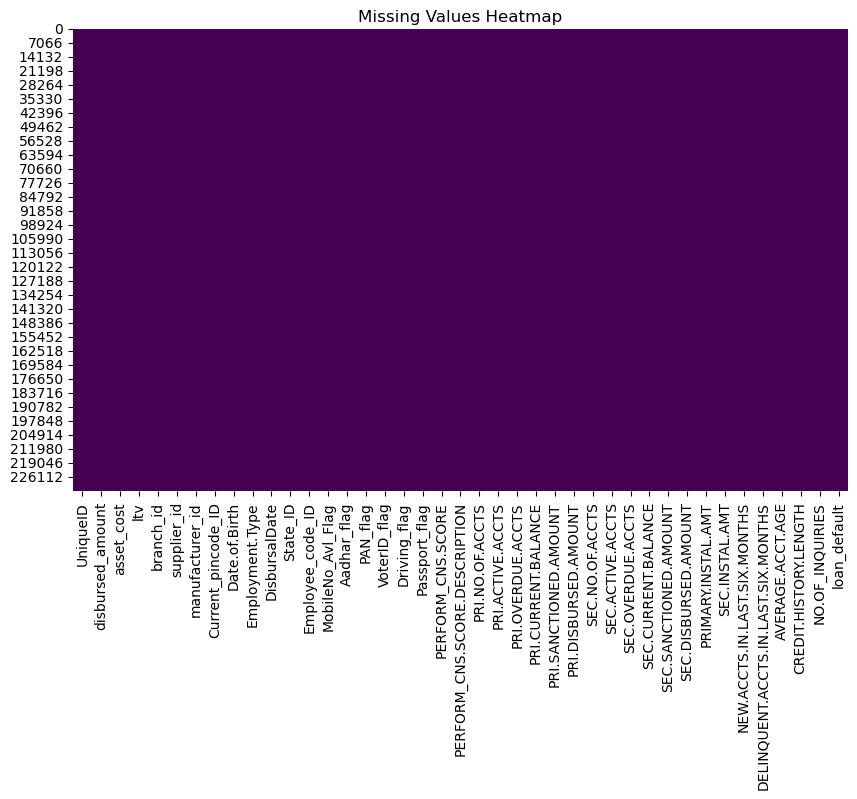

In [8]:
# Visualize missing values using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

Seperating numerical and categorical features

In [9]:
# List of columns with numerical features
numerical_feature_columns = list(df._get_numeric_data().columns)
numerical_feature_columns

['UniqueID',
 'disbursed_amount',
 'asset_cost',
 'ltv',
 'branch_id',
 'supplier_id',
 'manufacturer_id',
 'Current_pincode_ID',
 'State_ID',
 'Employee_code_ID',
 'MobileNo_Avl_Flag',
 'Aadhar_flag',
 'PAN_flag',
 'VoterID_flag',
 'Driving_flag',
 'Passport_flag',
 'PERFORM_CNS.SCORE',
 'PRI.NO.OF.ACCTS',
 'PRI.ACTIVE.ACCTS',
 'PRI.OVERDUE.ACCTS',
 'PRI.CURRENT.BALANCE',
 'PRI.SANCTIONED.AMOUNT',
 'PRI.DISBURSED.AMOUNT',
 'SEC.NO.OF.ACCTS',
 'SEC.ACTIVE.ACCTS',
 'SEC.OVERDUE.ACCTS',
 'SEC.CURRENT.BALANCE',
 'SEC.SANCTIONED.AMOUNT',
 'SEC.DISBURSED.AMOUNT',
 'PRIMARY.INSTAL.AMT',
 'SEC.INSTAL.AMT',
 'NEW.ACCTS.IN.LAST.SIX.MONTHS',
 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
 'NO.OF_INQUIRIES',
 'loan_default']

In [10]:
# List of columns with categorical features
categorical_feature_columns = list(set(df.columns) - set(numerical_feature_columns))
categorical_feature_columns

['Date.of.Birth',
 'AVERAGE.ACCT.AGE',
 'PERFORM_CNS.SCORE.DESCRIPTION',
 'DisbursalDate',
 'CREDIT.HISTORY.LENGTH',
 'Employment.Type']

Let's plot the histogram of below features to see its distribution

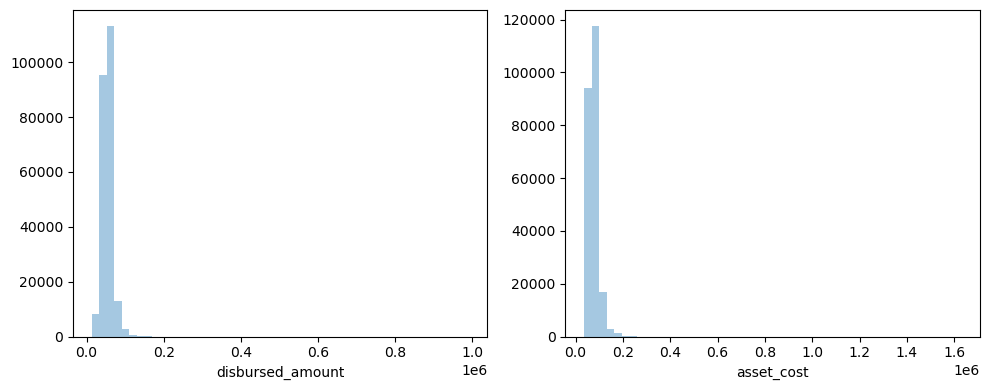

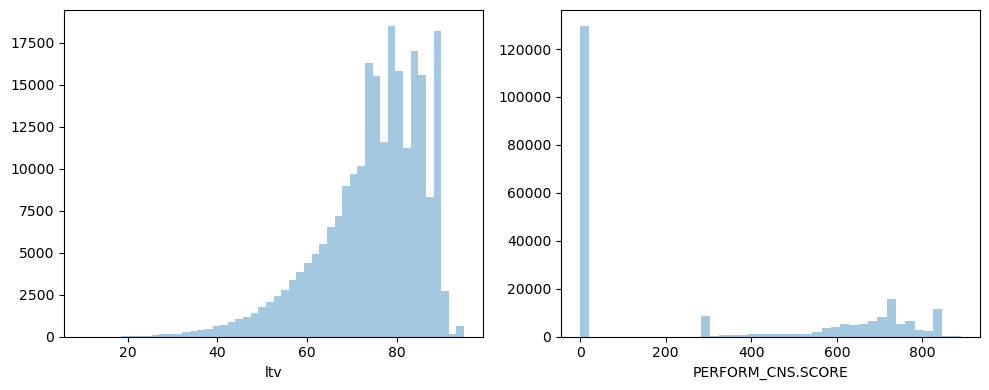

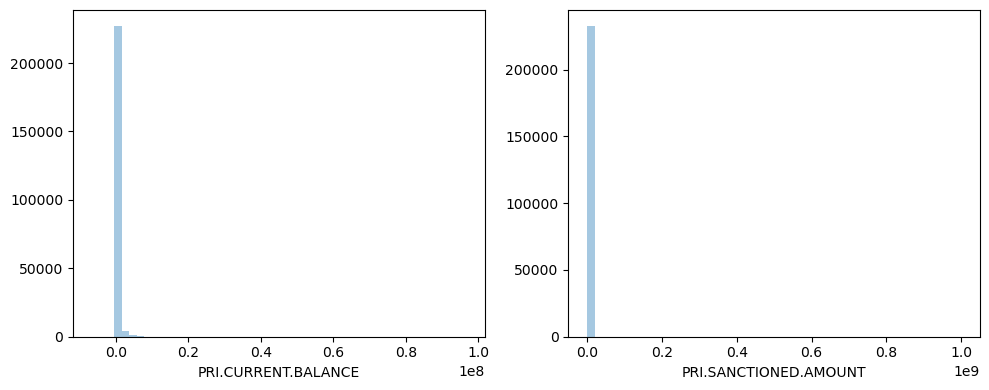

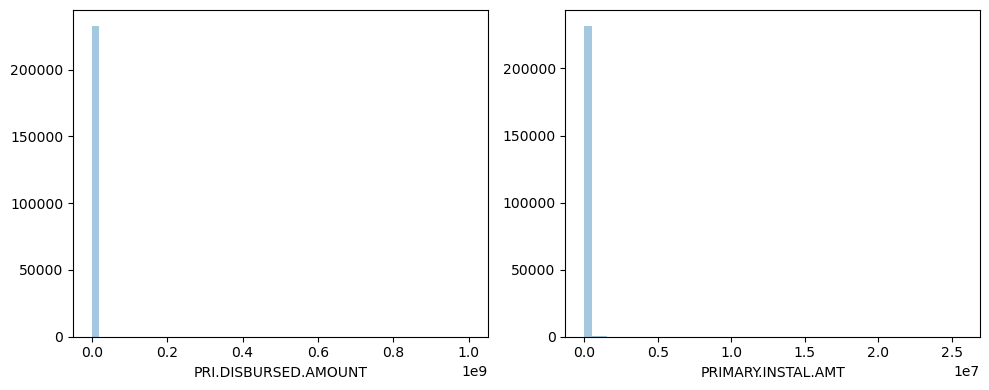

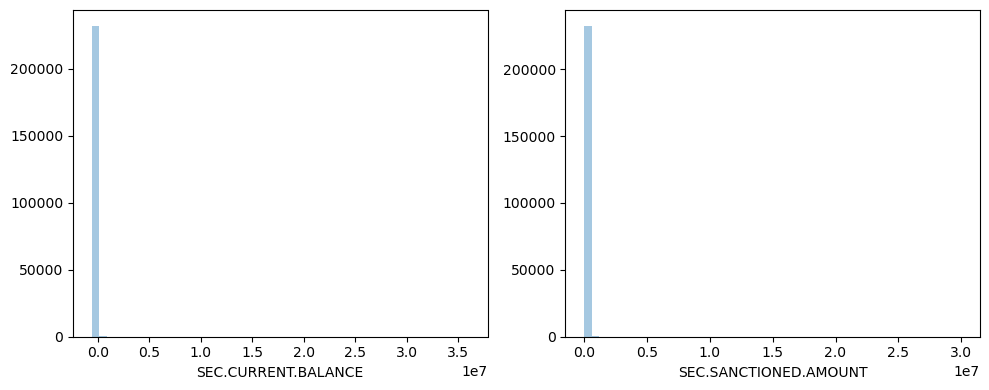

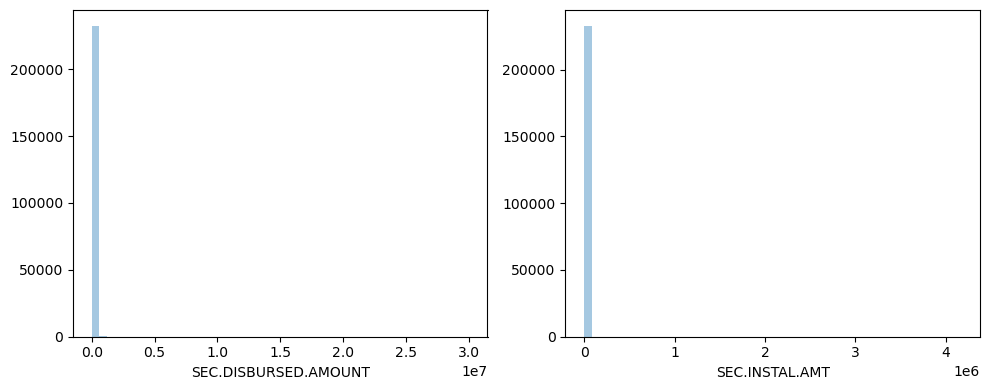

In [11]:
# Let's plot the histogram of below features to see its distribution
num_columns = ['disbursed_amount','asset_cost','ltv','PERFORM_CNS.SCORE','PRI.CURRENT.BALANCE','PRI.SANCTIONED.AMOUNT',
            'PRI.DISBURSED.AMOUNT','PRIMARY.INSTAL.AMT','SEC.CURRENT.BALANCE','SEC.SANCTIONED.AMOUNT','SEC.DISBURSED.AMOUNT',
            'SEC.INSTAL.AMT']

for i in range(0, len(num_columns), 2):
    plt.figure(figsize=(10,4))
    plt.subplot(121)
    sns.distplot(df[num_columns[i]], kde=False)
    plt.subplot(122)            
    sns.distplot(df[num_columns[i+1]], kde=False)
    plt.tight_layout()
    plt.show()

Checking categorical data

In [12]:
df[categorical_feature_columns].head()

,Date.of.Birth,AVERAGE.ACCT.AGE,PERFORM_CNS.SCORE.DESCRIPTION,DisbursalDate,CREDIT.HISTORY.LENGTH,Employment.Type
0,1984-01-01,0yrs 0mon,No Bureau History Available,2018-08-03,0yrs 0mon,Salaried
1,1985-08-24,0yrs 0mon,No Bureau History Available,2018-08-01,0yrs 0mon,Self employed
2,1977-12-09,0yrs 0mon,No Bureau History Available,2018-09-26,0yrs 0mon,Self employed
3,1988-06-01,0yrs 0mon,No Bureau History Available,2018-09-23,0yrs 0mon,Salaried
4,1994-07-14,0yrs 0mon,No Bureau History Available,2018-10-08,0yrs 0mon,Self employed


Two features 'AVERAGE.ACCT.AGE' and 'CREDIT.HISTORY.LENGTH' need to convert in terms of years.

In [13]:
df['AVERAGE.ACCT.AGE'] = df['AVERAGE.ACCT.AGE'].str.replace('yrs ','.',regex=False)
df['AVERAGE.ACCT.AGE'] = df['AVERAGE.ACCT.AGE'].str.replace('mon','',regex=False).astype(float)
df['CREDIT.HISTORY.LENGTH'] = df['CREDIT.HISTORY.LENGTH'].str.replace('yrs ','.',regex=False)
df['CREDIT.HISTORY.LENGTH'] = df['CREDIT.HISTORY.LENGTH'].str.replace('mon','',regex=False).astype(float)
df[categorical_feature_columns].head()

,Date.of.Birth,AVERAGE.ACCT.AGE,PERFORM_CNS.SCORE.DESCRIPTION,DisbursalDate,CREDIT.HISTORY.LENGTH,Employment.Type
0,1984-01-01,0.0,No Bureau History Available,2018-08-03,0.0,Salaried
1,1985-08-24,0.0,No Bureau History Available,2018-08-01,0.0,Self employed
2,1977-12-09,0.0,No Bureau History Available,2018-09-26,0.0,Self employed
3,1988-06-01,0.0,No Bureau History Available,2018-09-23,0.0,Salaried
4,1994-07-14,0.0,No Bureau History Available,2018-10-08,0.0,Self employed


In [14]:
# Count the each category values from feature
df['Employment.Type'].value_counts()

Self employed    135296
Salaried          97858
Name: Employment.Type, dtype: int64

In [15]:
# Encode the values in terms of 0 and 1
df['Employment.Type'].replace({'Salaried': 0, 'Self employed': 1}, inplace=True)

In [16]:
# Dropping unecessary features
df.drop(['Date.of.Birth','DisbursalDate','PERFORM_CNS.SCORE.DESCRIPTION'], axis = 1, inplace=True)

In [17]:
# Now let's check if null values present in data
df.isnull().sum().sum()

0

In [18]:
# Size of the data
df.shape

(233154, 38)

In [19]:
# Identify unique values in each features
df.nunique()

UniqueID                               233154
disbursed_amount                        24565
asset_cost                              46252
ltv                                      6579
branch_id                                  82
supplier_id                              2953
manufacturer_id                            11
Current_pincode_ID                       6698
Employment.Type                             2
State_ID                                   22
Employee_code_ID                         3270
MobileNo_Avl_Flag                           1
Aadhar_flag                                 2
PAN_flag                                    2
VoterID_flag                                2
Driving_flag                                2
Passport_flag                               2
PERFORM_CNS.SCORE                         573
PRI.NO.OF.ACCTS                           108
PRI.ACTIVE.ACCTS                           40
PRI.OVERDUE.ACCTS                          22
PRI.CURRENT.BALANCE               

Calculate correlation matrix to inspect correlation among features:

In [20]:
corr_max = df.corr()  #create correlation matrix
threshold = 0.5
corr_var_list = []
cols = df.columns.tolist()

for i in range(1, len(cols)):
    for j in range(i):
        if((abs(corr_max.iloc[i,j]) > threshold) & (abs(corr_max.iloc[i,j]) < 1)):
            corr_var_list.append([corr_max.iloc[i,j], i, j])

# Sort the list showing higher ones first 
sort_corr_list = sorted(corr_var_list, key=lambda x:abs(x[0]))

#Print correlations and column names
for corr_value, i, j in sort_corr_list:
    print (f"{cols[i]} and {cols[j]} = {round(corr_value, 2)}")

CREDIT.HISTORY.LENGTH and PRI.ACTIVE.ACCTS = 0.5
SEC.OVERDUE.ACCTS and SEC.NO.OF.ACCTS = 0.51
SEC.OVERDUE.ACCTS and SEC.ACTIVE.ACCTS = 0.53
NEW.ACCTS.IN.LAST.SIX.MONTHS and PRI.NO.OF.ACCTS = 0.54
NEW.ACCTS.IN.LAST.SIX.MONTHS and PRI.ACTIVE.ACCTS = 0.7
asset_cost and disbursed_amount = 0.75
PRI.ACTIVE.ACCTS and PRI.NO.OF.ACCTS = 0.75
CREDIT.HISTORY.LENGTH and AVERAGE.ACCT.AGE = 0.82
SEC.ACTIVE.ACCTS and SEC.NO.OF.ACCTS = 0.83
VoterID_flag and Aadhar_flag = -0.87
SEC.SANCTIONED.AMOUNT and SEC.CURRENT.BALANCE = 0.93
SEC.DISBURSED.AMOUNT and SEC.CURRENT.BALANCE = 0.93
PRI.DISBURSED.AMOUNT and PRI.SANCTIONED.AMOUNT = 1.0
SEC.DISBURSED.AMOUNT and SEC.SANCTIONED.AMOUNT = 1.0


#  2.Performing EDA:

Statistical description of quantitative data variables

In [21]:
quantitative_stats = df.describe()
print("Statistical Description of Quantitative Data Variables:")
print(quantitative_stats)

Statistical Description of Quantitative Data Variables:
            UniqueID  disbursed_amount    asset_cost            ltv  \
count  233154.000000     233154.000000  2.331540e+05  233154.000000   
mean   535917.573376      54356.993528  7.586507e+04      74.746530   
std     68315.693711      12971.314171  1.894478e+04      11.456636   
min    417428.000000      13320.000000  3.700000e+04      10.030000   
25%    476786.250000      47145.000000  6.571700e+04      68.880000   
50%    535978.500000      53803.000000  7.094600e+04      76.800000   
75%    595039.750000      60413.000000  7.920175e+04      83.670000   
max    671084.000000     990572.000000  1.628992e+06      95.000000   

           branch_id    supplier_id  manufacturer_id  Current_pincode_ID  \
count  233154.000000  233154.000000    233154.000000       233154.000000   
mean       72.936094   19638.635035        69.028054         3396.880247   
std        69.834995    3491.949566        22.141304         2238.147502   


Target variable distribution

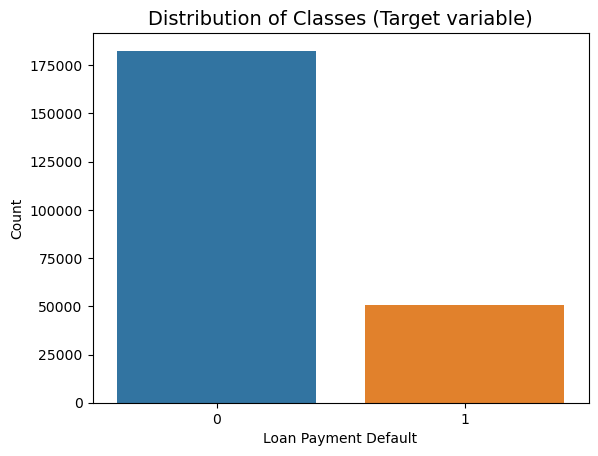

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='loan_default', data=df)

# Set plot labels and title
plt.xlabel('Loan Payment Default')
plt.ylabel('Count')
plt.title('Distribution of Classes (Target variable)', fontsize=14)

# Show the plot
plt.show()

Here we clearly see the imbalance between two classes. We need to resolve class imbalance by oversampling class 1.

In [23]:
# Over sampling to resolve imbalance
df = df.sample(frac=1)
loan_default_1 = df.loc[df['loan_default'] == 1]
loan_default_0 = df.loc[df['loan_default'] == 0]

normal_distributed_df = pd.concat([loan_default_1, loan_default_1, loan_default_1, loan_default_0])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)
new_df.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Employment.Type,State_ID,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
9855,484931,71365,85000,84.99,2,15097,86,2389,0,4,...,0,0,0,0,0,0,0.0,0.0,0,0
160004,436323,54499,75887,73.12,136,15523,86,3693,0,8,...,0,0,0,0,0,0,0.4,0.5,0,0
100489,586447,50003,70634,72.20,14,24004,86,820,1,15,...,0,0,0,0,0,0,0.0,0.0,1,1
222841,532227,58013,76902,78.02,36,23901,86,6553,1,13,...,0,0,1700,0,1,0,0.2,0.2,1,1
210758,588229,66002,92574,74.53,78,18404,86,2067,0,4,...,0,0,4034,0,1,1,2.4,4.1,2,0


Distribution of the payment_default in the dataset
0    0.545921
1    0.454079
Name: loan_default, dtype: float64


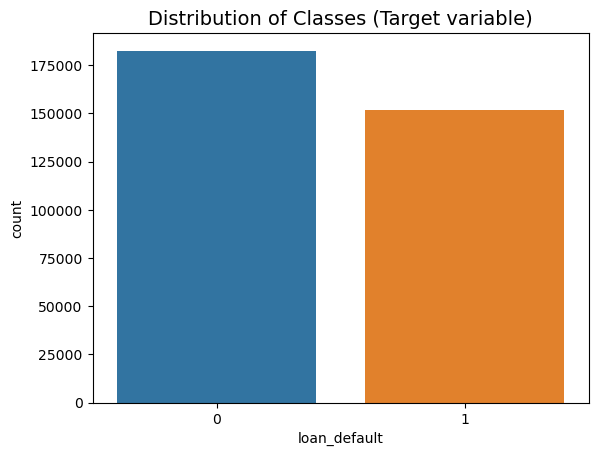

In [24]:
print('Distribution of the payment_default in the dataset')
print(new_df['loan_default'].value_counts()/len(new_df))

sns.countplot(x='loan_default', data=new_df) 
plt.title('Distribution of Classes (Target variable)', fontsize=14)
plt.show()

In [25]:
# Size of dataset after over sampling
new_df.shape

(334376, 38)

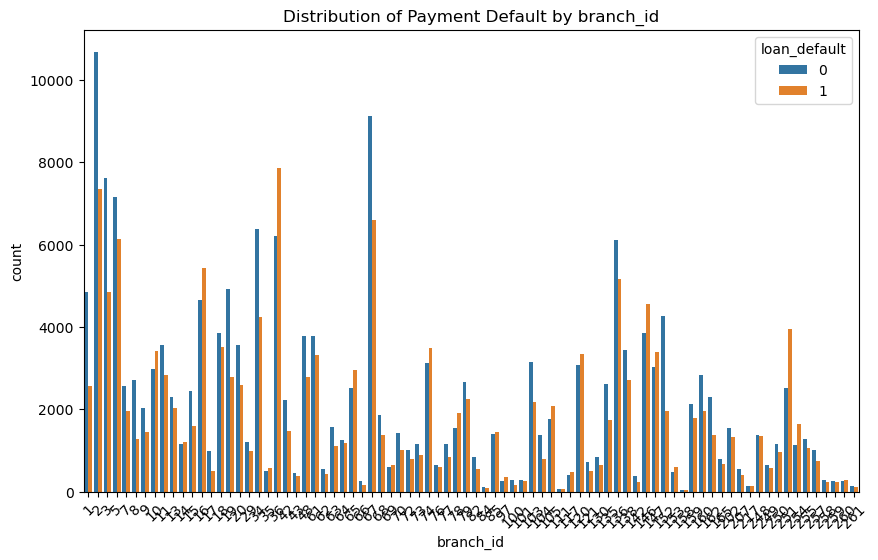

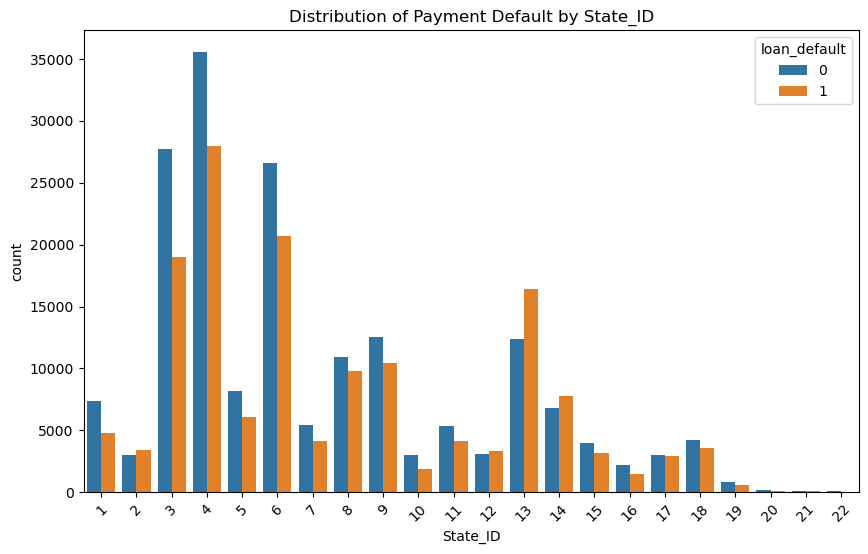

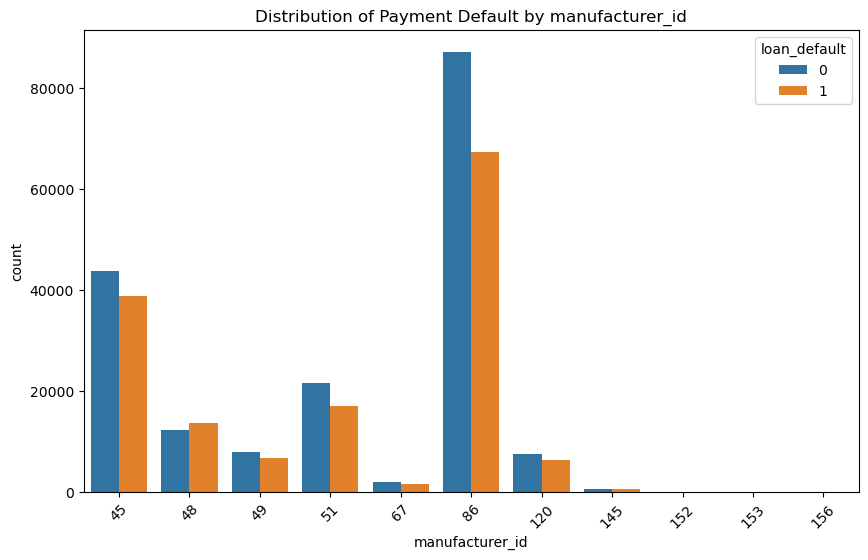

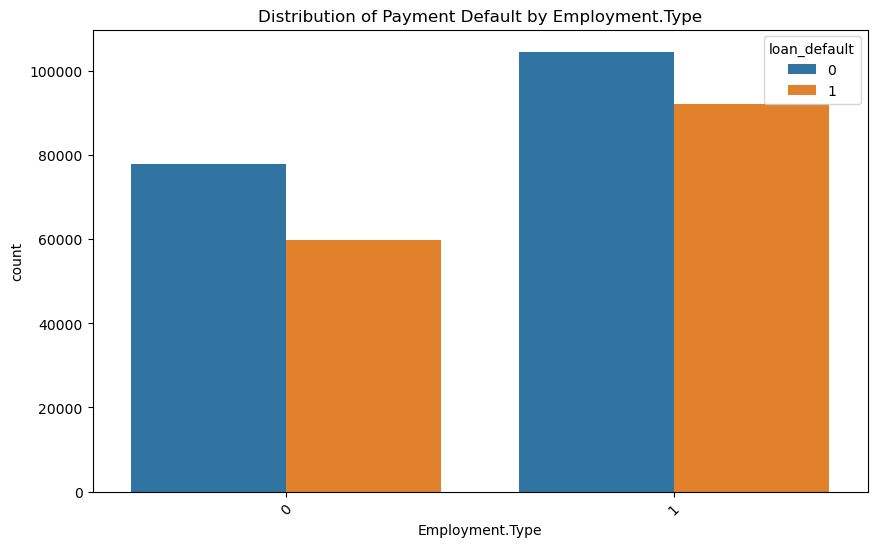

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

categorical_features = ['branch_id', 'State_ID', 'manufacturer_id', 'Employment.Type']
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, hue='loan_default', data=new_df)
    plt.title(f'Distribution of Payment Default by {feature}')
    plt.xlabel(feature)
    plt.xticks(rotation=45)
    plt.show()

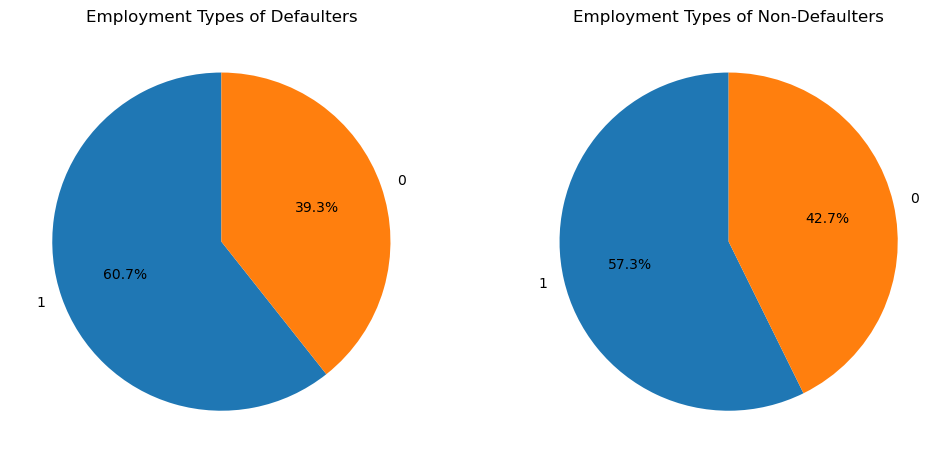

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Determine unique employment types
employment_types = new_df['Employment.Type'].unique()

# Step 2: Create subsets for defaulters and non-defaulters
defaulter_subset = new_df[new_df['loan_default'] == 1]
non_defaulter_subset = new_df[new_df['loan_default'] == 0]

# Step 3: Count occurrences of employment types in both subsets
defaulter_counts = defaulter_subset['Employment.Type'].value_counts()
non_defaulter_counts = non_defaulter_subset['Employment.Type'].value_counts()

# Step 4: Create pie charts
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart for defaulters
axes[0].pie(defaulter_counts, labels=defaulter_counts.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Employment Types of Defaulters')

# Pie chart for non-defaulters
axes[1].pie(non_defaulter_counts, labels=non_defaulter_counts.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Employment Types of Non-Defaulters')

plt.show()

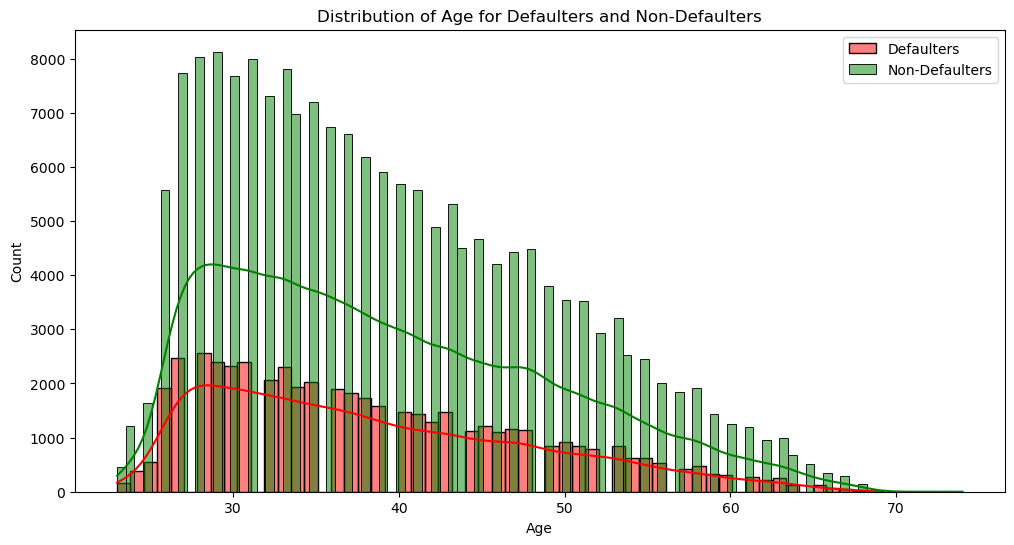

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('D:\Data Analytics\Data Capstones\Banking\Project2_Dataset\Dataset\data.xlsx')

# Step 1: Calculate the age of each customer
df['date_of_birth'] = pd.to_datetime(df['Date.of.Birth'])  # Convert to datetime
current_year = pd.to_datetime('now').year  # Get the current year
df['age'] = current_year - df['Date.of.Birth'].dt.year

# Step 2: Create subsets for defaulters and non-defaulters
defaulter_subset = df[df['loan_default'] == 1]
non_defaulter_subset = df[df['loan_default'] == 0]

# Step 3: Plot histograms or density plots to visualize age distribution
plt.figure(figsize=(12, 6))
sns.histplot(defaulter_subset['age'], kde=True, label='Defaulters', color='red')
sns.histplot(non_defaulter_subset['age'], kde=True, label='Non-Defaulters', color='green')
plt.title('Distribution of Age for Defaulters and Non-Defaulters')
plt.xlabel('Age')
plt.legend()
plt.show()

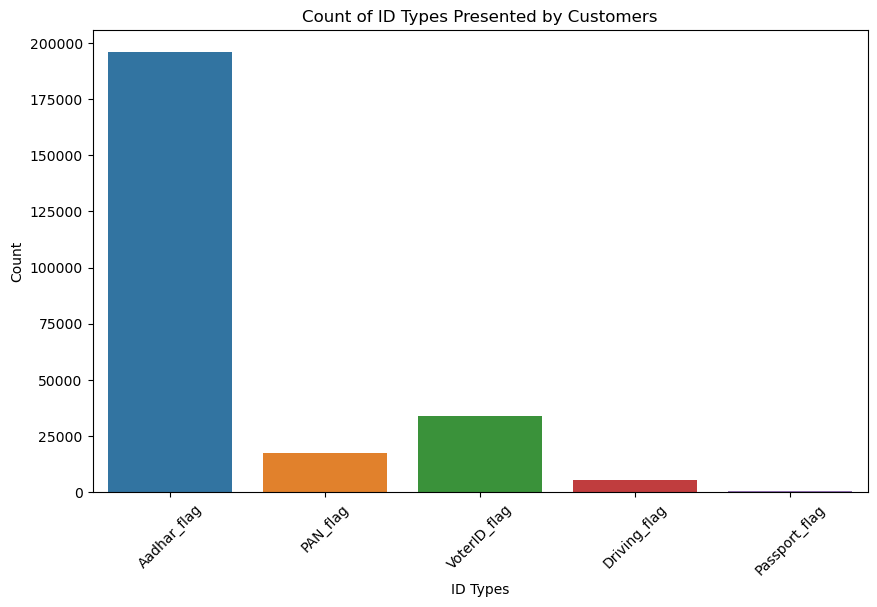

The most presented ID type is: Aadhar_flag


In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

id_columns = ['Aadhar_flag', 'PAN_flag', 'VoterID_flag', 'Driving_flag', 'Passport_flag']

# Calculate the count of each ID type
id_counts = df[id_columns].sum()

# Create a bar plot to show the count of each ID type
plt.figure(figsize=(10, 6))
sns.barplot(x=id_counts.index, y=id_counts.values)
plt.title('Count of ID Types Presented by Customers')
plt.xlabel('ID Types')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Find the ID type presented by most customers
most_presented_id = id_counts.idxmax()
print(f"The most presented ID type is: {most_presented_id}")

# 3. Performing EDA and Modeling:

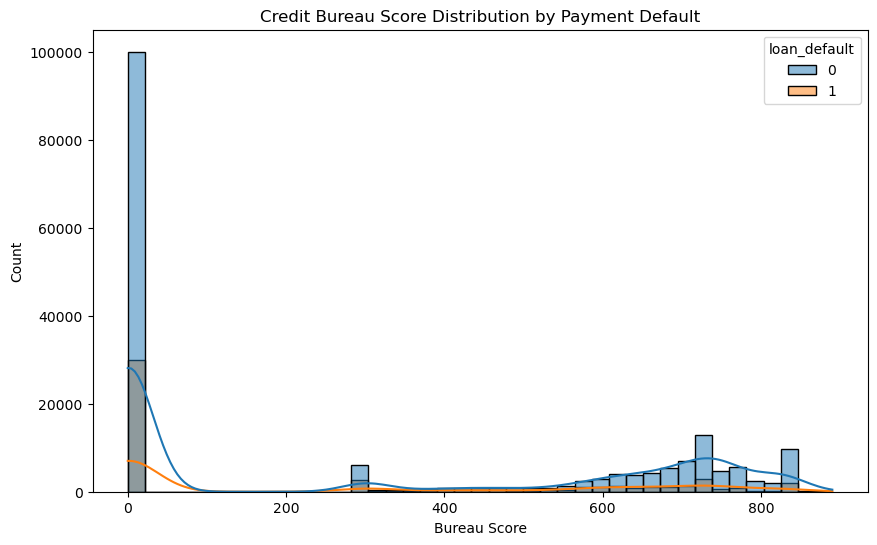

In [30]:
# 1.Study the credit bureau score distribution. How is the distribution for defaulters vs. non-defaulters? Explore in detail.

import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of bureau scores for defaulters and non-defaulters
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='PERFORM_CNS.SCORE', hue='loan_default', kde=True)
plt.title('Credit Bureau Score Distribution by Payment Default')
plt.xlabel('Bureau Score')
plt.show()

In [31]:
# 2.Calculate summary statistics for primary and secondary accounts by payment default
primary_loan_default = new_df[new_df['loan_default'] == 1]['PRI.NO.OF.ACCTS'].describe()
primary_loan_non_default = new_df[new_df['loan_default'] == 0]['PRI.NO.OF.ACCTS'].describe()

print("Summary Statistics for Defaulters - Primary Loans:")
print(primary_loan_default)

print("\nSummary Statistics for Non-Defaulters - Primary Loans:")
print(primary_loan_non_default)

Summary Statistics for Defaulters - Primary Loans:
count    151833.000000
mean          2.089328
std           5.040100
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         453.000000
Name: PRI.NO.OF.ACCTS, dtype: float64

Summary Statistics for Non-Defaulters - Primary Loans:
count    182543.000000
mean          2.538038
std           5.261142
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max         354.000000
Name: PRI.NO.OF.ACCTS, dtype: float64


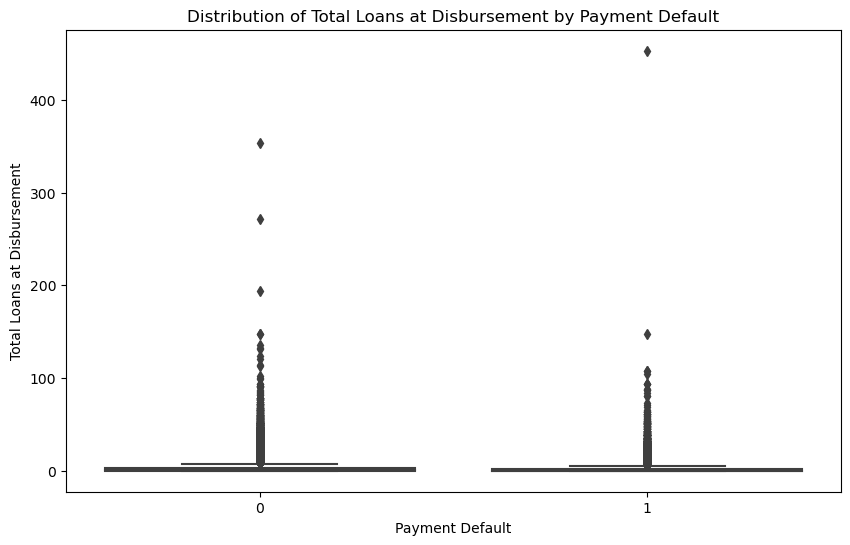

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot to compare primary loan details for defaulters and non-defaulters
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_default', y='PRI.NO.OF.ACCTS', data=df)
plt.title('Distribution of Total Loans at Disbursement by Payment Default')
plt.xlabel('Payment Default')
plt.ylabel('Total Loans at Disbursement')
plt.show()

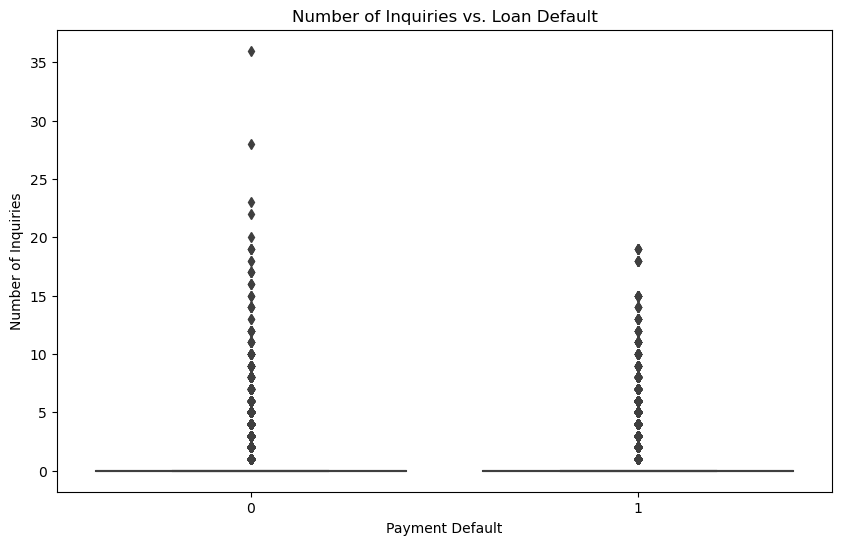

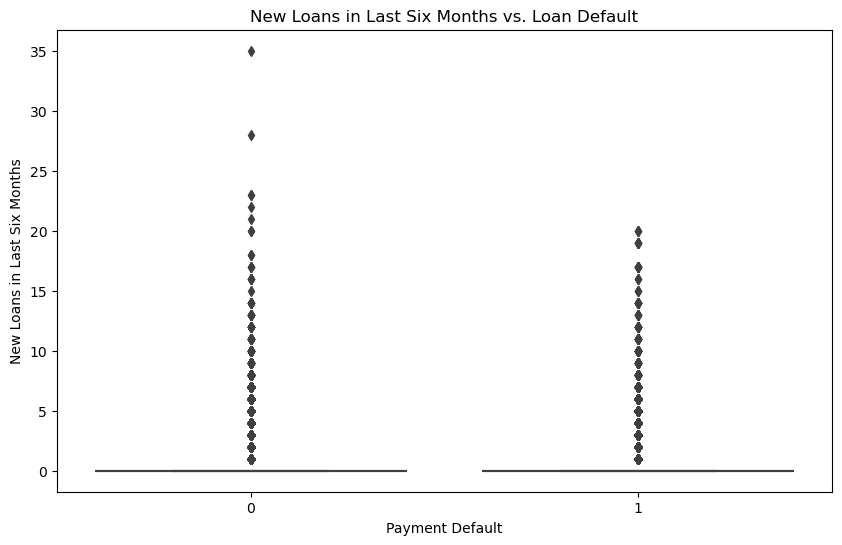

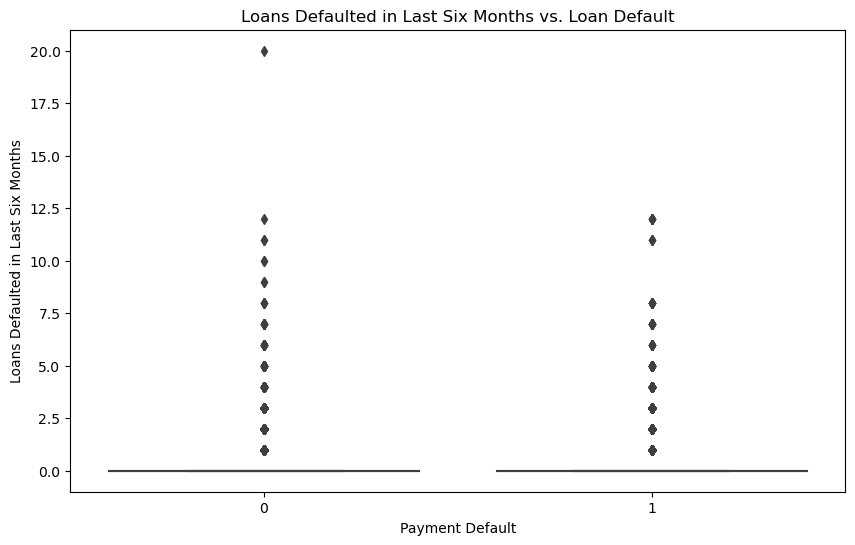

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Number of Inquiries
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_default', y='NO.OF_INQUIRIES', data=new_df)
plt.title('Number of Inquiries vs. Loan Default')
plt.xlabel('Payment Default')
plt.ylabel('Number of Inquiries')
plt.show()

# Credit History - New Loans in Last Six Months
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_default', y='NEW.ACCTS.IN.LAST.SIX.MONTHS', data=new_df)
plt.title('New Loans in Last Six Months vs. Loan Default')
plt.xlabel('Payment Default')
plt.ylabel('New Loans in Last Six Months')
plt.show()

# Credit History - Loans Defaulted in Last Six Months
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_default', y='DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', data=new_df)
plt.title('Loans Defaulted in Last Six Months vs. Loan Default')
plt.xlabel('Payment Default')
plt.ylabel('Loans Defaulted in Last Six Months')
plt.show()

Performing logistic regression model

In [34]:
# Seperate features and target variable
X = new_df.drop('loan_default', axis=1)
y = new_df['loan_default'].copy()

In [35]:
# Split train and test data with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = random_state)
print("X_train size: ", X_train.shape)
print("X_test size: ", X_test.shape)

X_train size:  (234063, 37)
X_test size:  (100313, 37)


# Build and evaluate models
 Define evaluation function which calculates following metrics:

 Confusion matrix
 Accuracy score
 Precision
 Recall
 F1 score
 ROC AUC score.

In [36]:
def evaluate_model(y_test, y_pred):
    print("Confusion Matrix: \n", metrics.confusion_matrix(y_test, y_pred))
    print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))
    print("Precision: ",metrics.precision_score(y_test, y_pred))
    print("Recall: ",metrics.recall_score(y_test, y_pred))
    print("f1 score: ",metrics.f1_score(y_test, y_pred))
    print("roc_auc_score: ",metrics.roc_auc_score(y_test, y_pred))

In [37]:
# Scaling data before model training and testing
scaler = StandardScaler()  
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 1. Logistic Regression

In [38]:
#Find best parameters using grid search
params = {'C':[0.1, 0.5, 1, 5]}

lr = LogisticRegression()
grid = GridSearchCV(estimator=lr, param_grid=params)
grid.fit(X_train, y_train)
y_pred = grid.predict(X_test)
evaluate_model(y_test, y_pred)

Confusion Matrix: 
 [[39389 15524]
 [24924 20476]]
Accuracy:  0.5967820721142822
Precision:  0.5687777777777778
Recall:  0.4510132158590308
f1 score:  0.5030958230958231
roc_auc_score:  0.5841557438354029


# 2. Decision Trees

In [39]:
params = {'criterion':['gini','entropy'], 'max_depth': [2,3,4,5]}
dt = DecisionTreeClassifier()
dt_clf = 
evaluate_model(y_test, y_pred)GridSearchCV(dt, params)
dt_clf.fit(X_train, y_train)
y_pred = dt_clf.predict(X_test)

Confusion Matrix: 
 [[36664 18249]
 [22701 22699]]
Accuracy:  0.5917777356872987
Precision:  0.554337208166455
Recall:  0.49997797356828194
f1 score:  0.5257562421827953
roc_auc_score:  0.5838261473836347


# 3. Random Forest

In [40]:
rf = RandomForestClassifier(n_estimators=250, random_state=random_state)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
evaluate_model(y_test, y_pred)

Confusion Matrix: 
 [[49521  5392]
 [ 3342 42058]]
Accuracy:  0.912932521208617
Precision:  0.8863645943097997
Recall:  0.9263876651982379
f1 score:  0.9059343026386645
roc_auc_score:  0.914097990084596


# Conclusion
 In this classification problem, it is clear the Random Forest Classifier outperformes Logistic Regression and Decision Trees models.